In [1]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#First We will see elaborated info about the data frame
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


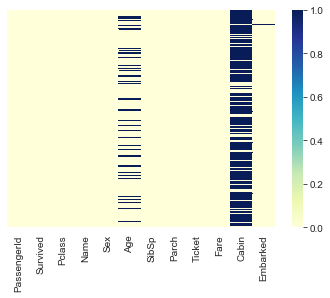

In [6]:
#Then we will check the integrity of the data
sns.heatmap(titanic.isnull(),yticklabels=False, cmap="YlGnBu")

Now we would like to visualize the data to better understand it

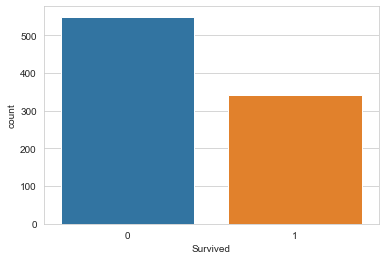

In [7]:
#For the first visualization, we would like to see how many people survived :
sns.countplot(x='Survived',data=titanic)

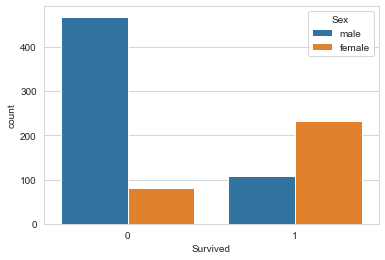

In [8]:
#Next, we will want to visualize how many survived amongst the men and the women. we will add a hue to do that
sns.countplot(x='Survived',hue="Sex",data=titanic)

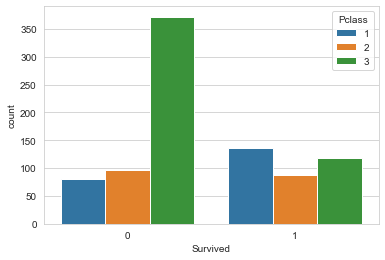

In [9]:
#Next, we will try and see if there is a connection to the pclass of which
#Each member was a part of, during the catastrophe.
#We would do that by just changing the hue value to indacte a pclass
sns.countplot(x='Survived',hue="Pclass",data=titanic)

<h3>By doing so, we can figure that there is a strong connection between the value of the class to the survival rates.</h3>

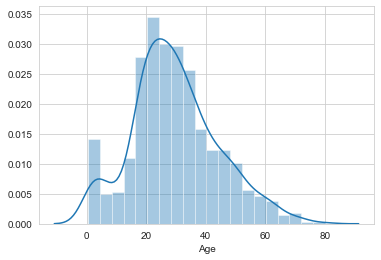

In [10]:
#check the distribution of ages among the data
sns.set_style("whitegrid")
sns.distplot(titanic["Age"], bins=20)

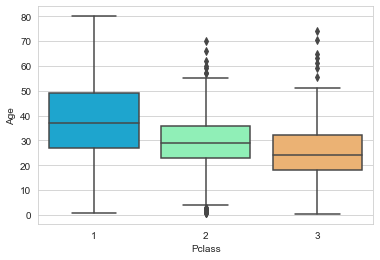

In [11]:

sns.boxplot(x='Pclass', y='Age', data=titanic, palette='rainbow')

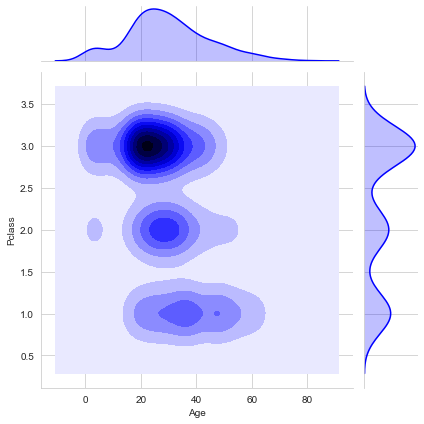

In [12]:
sns.jointplot(x="Age", y="Pclass", data=titanic, color="blue", kind="kde")

<h4>Now we will move to clean and prepare the data to make it readable to the logistic function,
First, by filling the null values with arbtrary values so it would not change the outcome so much.
to do that, we will choose the average (mean) values of each instances</h4>

In [13]:
#At first we will clean the cols that are not relevant
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(inplace=True)



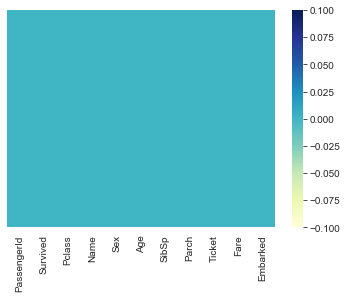

In [14]:
sns.heatmap(titanic.isnull(),yticklabels=False, cmap="YlGnBu")

In [15]:
len(titanic)

712

In [16]:
titanic['Age'].mean()

29.64209269662921

In [17]:
titanic[(titanic['Pclass']==1)]['Age'].mean()

38.10554347826087

In [18]:
pclass3_mean = titanic[(titanic['Pclass']==3)]['Age'].mean()
pclass2_mean = titanic[(titanic['Pclass']==2)]['Age'].mean()
pclass1_mean = titanic[(titanic['Pclass']==1)]['Age'].mean()
pclass2_mean

29.87763005780347

In [19]:
def fill_values_into_age(array):
    age_array = array[0]
    class_array = array[1]
    
    if pd.isnull(age_array):
        if class_array == 1:
            return pclass1_mean
        if class_array == 2:
            return pclass2_mean
        if class_array == 3:
            return pclass3_mean
    else:
        return age_array


In [20]:
titanic['Age'] = titanic[['Age','Pclass']].apply(fill_values_into_age,axis=1)


<h5>The next thing that we would like to do is to change some aspects of the data frame into numerical one so that the algorithem can understand it.
to do that we will use the pandas.get_dummies function. to avoid multicollinearity, which is a state that a value is a **perfect** predictor of its significant other, we use the 'drop first' attribute*</h5>

In [21]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
sex_enumerated = pd.get_dummies(titanic['Sex'],drop_first =True)

In [23]:
embarked_town_enumerated = pd.get_dummies(titanic['Embarked'],drop_first = True)

In [24]:
titanic = pd.concat([titanic,sex_enumerated,embarked_town_enumerated],axis=1)

In [25]:
titanic.drop(['Sex', 'Embarked','Name','Ticket'],axis=1, inplace=True)

<h1>Now the data is ready !<h1>

In [26]:

titanic_train = titanic

x_train = titanic_train.drop('Survived',axis=1)


In [27]:
titanic_test = pd.read_csv('test.csv')
y_train = titanic_train['Survived']



<h4> Atfer trying and fitting the model acouple of times I found out that there is a Null value in 'test.csv' that prevents the prediction process from being completed.
    <blockquote>For the first answer I simply used DataFrame.dropna to ignore it, but that caused my precision to be less accurate</blockquote>
    <blockquote>Therefore, for the second solution I did the same 'artificial data fill' that I did for the 'Age' column: I took the mean value of fare for the passngeres that were from his same Pclass and filled it in the data frame. that is what I do here :</blockquote></h4>

In [28]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
far_for_the_null_cell = titanic_test[(titanic_test['Pclass']==3)]['Fare'].mean()

In [30]:
index = titanic_test[titanic_test['Fare'].isnull()].index
index

Int64Index([152], dtype='int64')

In [31]:
titanic_test.loc[index,'Fare'] = far_for_the_null_cell

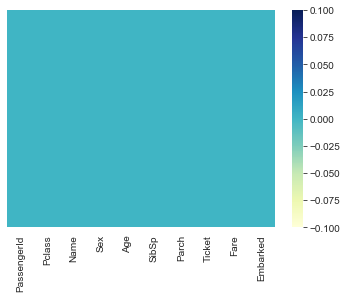

In [32]:
#Next we will do the same cleaning to the test data frame:

pclass3_mean = titanic_test[(titanic_test['Pclass']==3)]['Age'].mean()
pclass2_mean = titanic_test[(titanic_test['Pclass']==2)]['Age'].mean()
pclass1_mean = titanic_test[(titanic_test['Pclass']==1)]['Age'].mean()

titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(fill_values_into_age,axis=1)

titanic_test.drop('Cabin',axis=1,inplace=True)


sns.heatmap(titanic_test.isnull(),yticklabels=False, cmap="YlGnBu")

In [33]:
sex_enumerated = pd.get_dummies(titanic_test['Sex'],drop_first =True)
embarked_town_enumerated = pd.get_dummies(titanic_test['Embarked'],drop_first = True)
titanic_test = pd.concat([titanic_test,sex_enumerated,embarked_town_enumerated],axis=1)

titanic_test.drop(['Sex', 'Embarked','Name','Ticket'],axis=1, inplace=True)

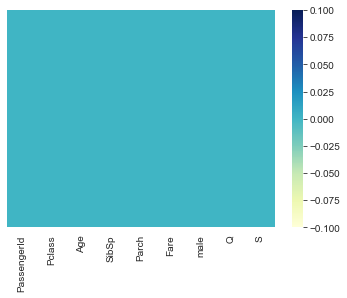

In [34]:
titanic_test.head()     #the test for out model

#y_train.head()          #the y train of our model (the outcome we want to value by)
#x_train.head()          #All the parameters that we use to determin a valid y result

#titanic_test.dropna(inplace=True)
sns.heatmap(titanic_test.isnull(),yticklabels=False, cmap="YlGnBu")


<h1>Now we are ready to feed to the logistic regression classifier !</h1>

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic_model = LogisticRegression()

In [37]:
logistic_model.fit(x_train,y_train)

C:\Users\IDO-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predicts = logistic_model.predict(titanic_test)
predicts

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [39]:
len(titanic_test)

418

In [40]:

y_test = pd.read_csv("gender_submission.csv")


In [41]:
y_test.drop('PassengerId',axis =1,inplace = True)


In [42]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


<h3> And for the final evaluation of the model :</h4>

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       266
           1       0.78      0.99      0.87       152

    accuracy                           0.89       418
   macro avg       0.89      0.92      0.89       418
weighted avg       0.92      0.89      0.90       418



<h1> Export the model for submission :</h1>

In [44]:
y_test = pd.read_csv("gender_submission.csv")
submission = pd.DataFrame({
        "PassengerId": y_test["PassengerId"],
        "Survived": predicts
    })

submission.to_csv('submission.csv', index=False)